In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
profile = pd.read_csv("data/profile.csv")
portfolio = pd.read_csv("data/portfolio-dummy.csv")
train_set = pd.read_csv("data/train.csv")
test_set = pd.read_csv("data/test.csv")
train_transactions = pd.read_csv("data/train_transactions.csv")
test_transactions = pd.read_csv("data/test_transactions.csv")

In [19]:
def encode_dataset(df, transactions, shuffle=False):
    """
        generate dataset for training for testing
        merge the user'information, offer which user received, transaction which user made.
        and preprocess the data.
    """
    df = df.merge(profile, left_on='person', right_on='id') \
        .merge(portfolio, left_on='offer_id', right_on="id") \
        .merge(transactions, left_on='person', right_on='person')
    if shuffle:
        df = df.sample(frac=1)
        
    df = df.drop(columns=['id_x', 'id_y'])
    return df

train = encode_dataset(train_set, train_transactions, True)
test = encode_dataset(test_set, test_transactions, False)
data = pd.concat([train, test], axis=0)
data

,person,offer_id,offer viewed,age,income,income_na,gender_F,gender_M,gender_O,age_na,...,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,amount
27625,bdc18485441448439f1197858094e5e9,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,67.000000,43000.000000,0,1,0,0,0,...,5,7,1.0,1.0,0.0,1.0,1,0,0,68.53
24961,6006641a7b15444fae1ae0a7e27a88dd,f19421c1d4aa40978ebb69ca19b0e20d,1.0,80.000000,87000.000000,0,1,0,0,0,...,5,5,1.0,1.0,1.0,1.0,1,0,0,158.71
22089,f6e6b0f97b004170b65794fdf80294db,f19421c1d4aa40978ebb69ca19b0e20d,1.0,41.000000,88000.000000,0,0,1,0,0,...,5,5,1.0,1.0,1.0,1.0,1,0,0,242.66
25434,6f6d0c5ddfdb431d962677551aa87cce,2906b810c7d4411798c6938adc9daaa5,1.0,61.000000,55000.000000,0,0,1,0,0,...,10,7,1.0,1.0,0.0,1.0,0,1,0,42.78
4295,5956b48eb2dc4f3f9ee56615a2c1e3c0,2906b810c7d4411798c6938adc9daaa5,0.0,56.000000,108000.000000,0,1,0,0,0,...,10,7,1.0,1.0,0.0,1.0,0,1,0,27.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165,fd3e1ba4df4b4db0af9cf727eb1651ac,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,42.000000,36000.000000,0,0,1,0,0,...,10,5,1.0,1.0,1.0,1.0,1,0,0,38.31
22166,fd45aee3900f4b3c88a35b53d0bf630b,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,63.000000,65000.000000,0,1,0,0,0,...,10,5,1.0,1.0,1.0,1.0,1,0,0,17.88
22167,fdd4556f915e425498cce83db7f3b85e,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,32.000000,53000.000000,0,0,1,0,0,...,10,5,1.0,1.0,1.0,1.0,1,0,0,7.03
22168,fe1122a36f5e462f82d489c65609408b,4d5c57ea9a6940dd891ad53e9dbe8da0,1.0,54.393524,65404.991568,1,0,0,0,1,...,10,5,1.0,1.0,1.0,1.0,1,0,0,2.09


# Visualize the relationship among offers and others

In [42]:
offer_types = ["offer_type_bogo", "offer_type_discount", "offer_type_informational"]
groupby_offer_types = pd.DataFrame([data[data[ot] == 1].mean() for ot in offer_types])#, index=offer_types)
groupby_offer_types["offer_types"] = offer_types
groupby_offer_types

,offer viewed,age,income,income_na,gender_F,gender_M,gender_O,age_na,member_since,reward,...,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,amount,offer_types
0,0.842172,54.156786,64968.458520,0.124336,0.360849,0.503154,0.011661,0.124336,2016.583904,7.514433,...,6.002868,1.0,1.000000,0.751329,0.747238,1.0,0.0,0.0,64.032527,offer_type_bogo
1,0.711088,54.117962,64975.682977,0.122765,0.359755,0.505365,0.012115,0.122765,2016.586477,2.999654,...,8.501327,1.0,0.751163,0.504750,1.000000,0.0,1.0,0.0,65.199938,offer_type_discount
2,0.721755,54.396517,65002.852357,0.123390,0.364387,0.499653,0.012570,0.123390,2016.585024,0.000000,...,3.498342,1.0,1.000000,0.501658,0.498342,0.0,0.0,1.0,58.868919,offer_type_informational


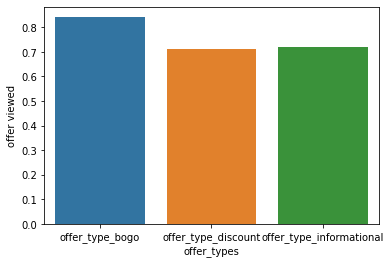

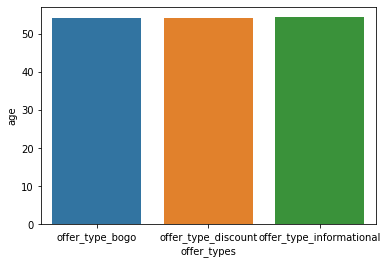

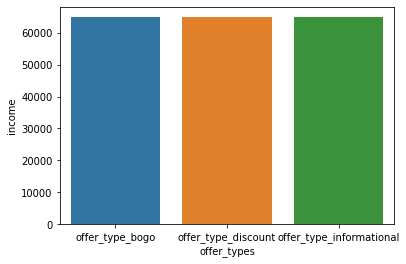

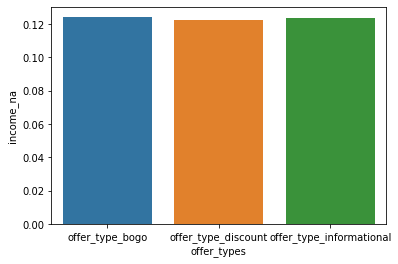

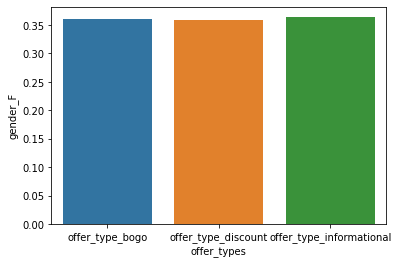

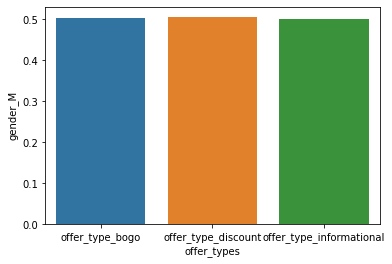

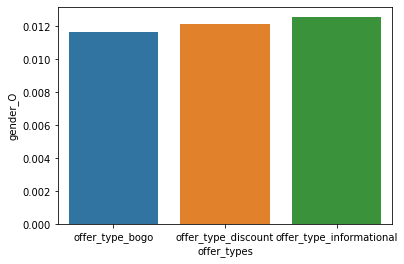

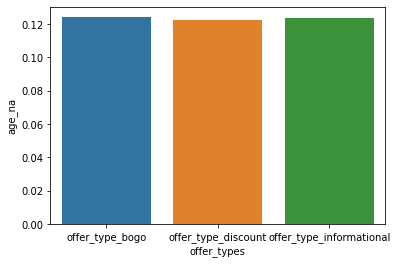

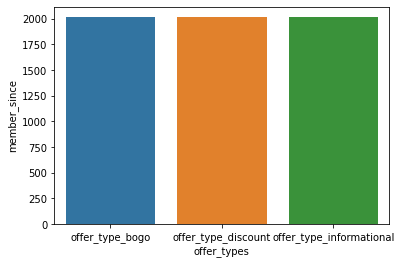

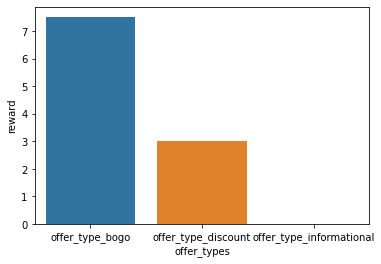

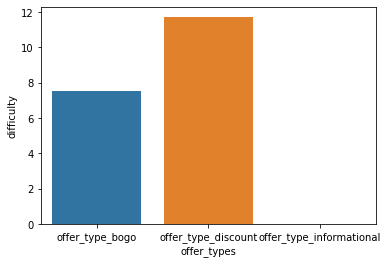

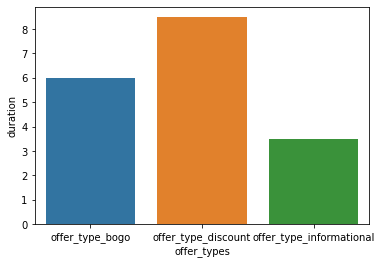

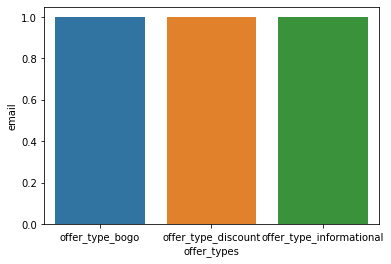

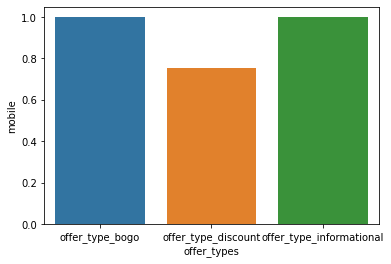

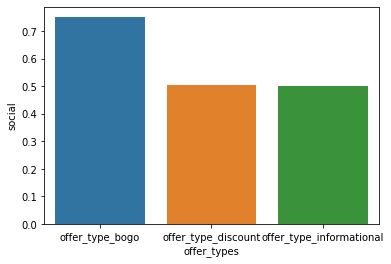

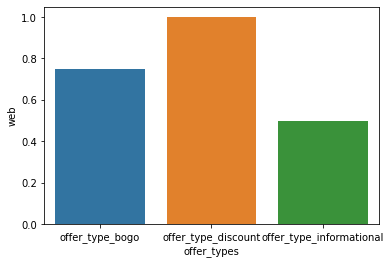

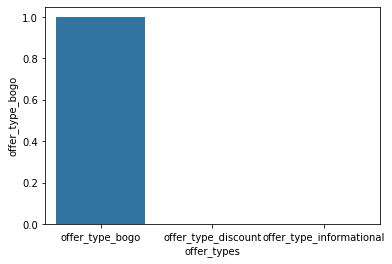

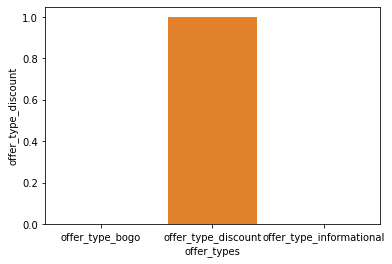

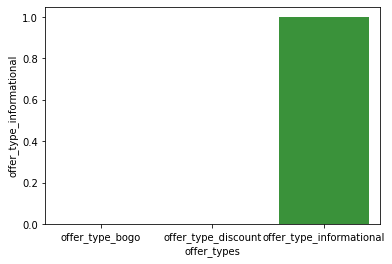

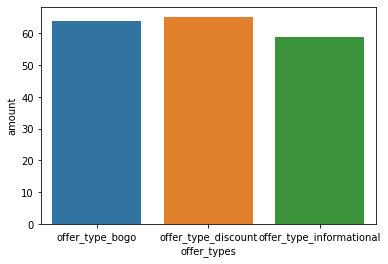

In [47]:
for column in groupby_offer_types.columns:
    if column == "offer_types":
        continue
        
    sns.barplot(data=groupby_offer_types, x="offer_types", y=column, label=f"{column} by offer type")
    plt.show()

In [31]:
data.groupby("offer_id").mean()

,offer viewed,age,income,income_na,gender_F,gender_M,gender_O,age_na,member_since,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,amount
offer_id,,,,,,,,,,,,,,,,,,,,
0b1e1539f2cc45b7b9fa7c272da2e1d7,0.351777,54.176040,64814.508264,0.119784,0.364142,0.503091,0.012983,0.119784,2016.576198,5.0,20.0,10.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,61.093629
2298d6c36e964ae4a3e7e9706d1fb8c2,0.962929,54.092560,64958.179582,0.125950,0.358098,0.503646,0.012306,0.125950,2016.628532,3.0,7.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,66.465962
2906b810c7d4411798c6938adc9daaa5,0.551896,53.924122,65103.787778,0.124083,0.359763,0.504136,0.012018,0.124083,2016.569221,2.0,10.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,62.293571
3f207df678b143eea3cee63160fa8bed,0.552151,54.387970,64918.161299,0.122717,0.363355,0.502167,0.011761,0.122717,2016.585422,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,57.999175
4d5c57ea9a6940dd891ad53e9dbe8da0,0.964231,54.113514,65141.363992,0.122592,0.361510,0.506267,0.009630,0.122592,2016.574289,10.0,10.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,64.216125
5a8bc65990b245e5a138643cd4eb9837,0.890238,54.405008,65086.983581,0.124058,0.365411,0.497156,0.013374,0.124058,2016.584627,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,59.732913
9b98b8c7a33c4b65b9aebfe6a799e6d9,0.553044,54.156267,64650.620876,0.124385,0.365160,0.497232,0.013223,0.124385,2016.565652,5.0,5.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,60.759387
ae264e3637204a6fb9bb56bc8210ddfd,0.888822,54.040112,65075.090486,0.121918,0.360006,0.505824,0.012252,0.121918,2016.591741,10.0,10.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,66.715235
f19421c1d4aa40978ebb69ca19b0e20d,0.961219,54.319574,65004.027079,0.128501,0.356725,0.503232,0.011542,0.128501,2016.603878,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,64.394489


<AxesSubplot:title={'center':'Mean of offer viewed'}, xlabel='offer_id'>

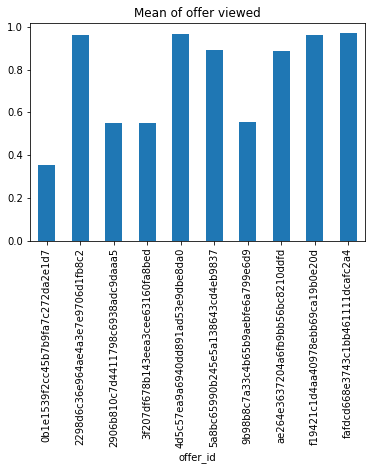

In [18]:
data.groupby("offer_id").mean()['offer viewed'].plot(kind="bar", title="Mean of offer viewed")

<AxesSubplot:>

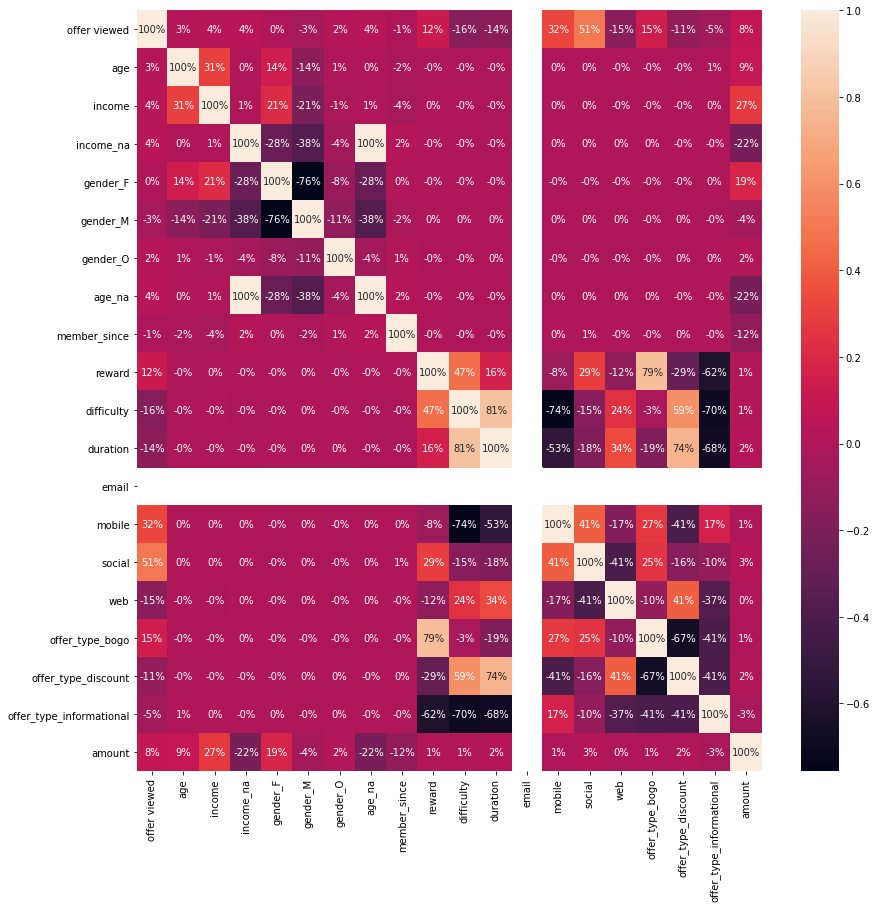

In [53]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, fmt=".0%")

In [24]:
# mean offer viewed by offer
portfolio.index = portfolio.id
pd.concat([data.groupby("offer_id").mean()['offer viewed'], portfolio], axis=1)

,offer viewed,id,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
0b1e1539f2cc45b7b9fa7c272da2e1d7,0.351777,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,20,10,1.0,0.0,0.0,1.0,0,1,0
2298d6c36e964ae4a3e7e9706d1fb8c2,0.962929,2298d6c36e964ae4a3e7e9706d1fb8c2,3,7,7,1.0,1.0,1.0,1.0,0,1,0
2906b810c7d4411798c6938adc9daaa5,0.551896,2906b810c7d4411798c6938adc9daaa5,2,10,7,1.0,1.0,0.0,1.0,0,1,0
3f207df678b143eea3cee63160fa8bed,0.552151,3f207df678b143eea3cee63160fa8bed,0,0,4,1.0,1.0,0.0,1.0,0,0,1
4d5c57ea9a6940dd891ad53e9dbe8da0,0.964231,4d5c57ea9a6940dd891ad53e9dbe8da0,10,10,5,1.0,1.0,1.0,1.0,1,0,0
5a8bc65990b245e5a138643cd4eb9837,0.890238,5a8bc65990b245e5a138643cd4eb9837,0,0,3,1.0,1.0,1.0,0.0,0,0,1
9b98b8c7a33c4b65b9aebfe6a799e6d9,0.553044,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,5,7,1.0,1.0,0.0,1.0,1,0,0
ae264e3637204a6fb9bb56bc8210ddfd,0.888822,ae264e3637204a6fb9bb56bc8210ddfd,10,10,7,1.0,1.0,1.0,0.0,1,0,0
f19421c1d4aa40978ebb69ca19b0e20d,0.961219,f19421c1d4aa40978ebb69ca19b0e20d,5,5,5,1.0,1.0,1.0,1.0,1,0,0
fafdcd668e3743c1bb461111dcafc2a4,0.968970,fafdcd668e3743c1bb461111dcafc2a4,2,10,10,1.0,1.0,1.0,1.0,0,1,0
